In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r'C:\Users\dimso\Downloads\sec.csv'
data1 = pd.read_csv(file_path)

In [13]:
data1

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In the cell below we make some visuals to have a better approach on the dataset


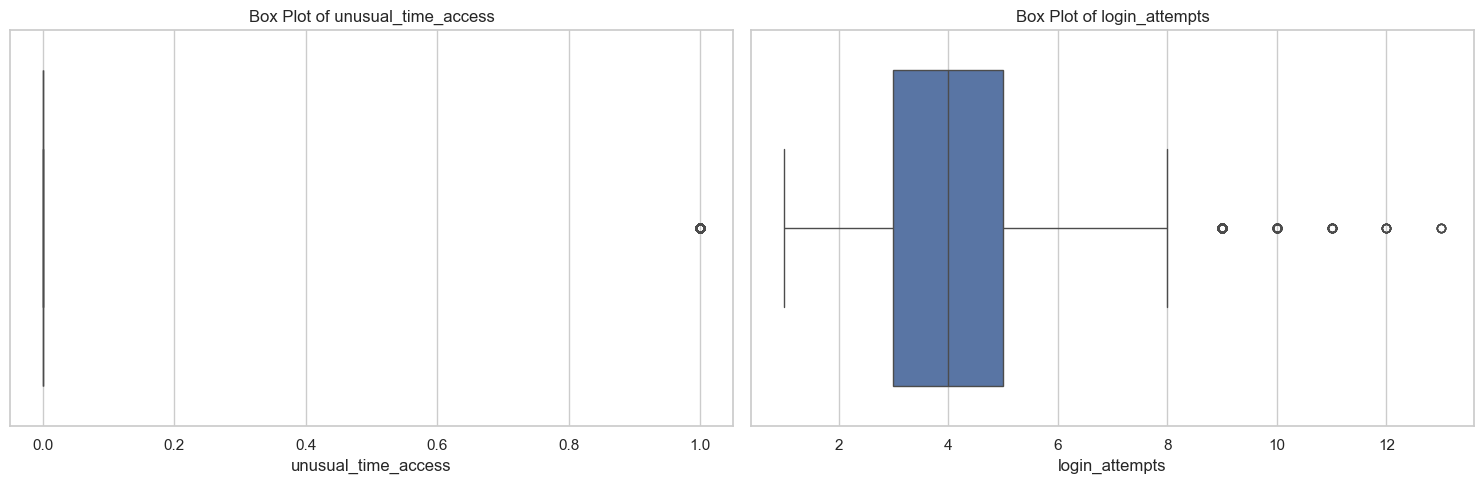

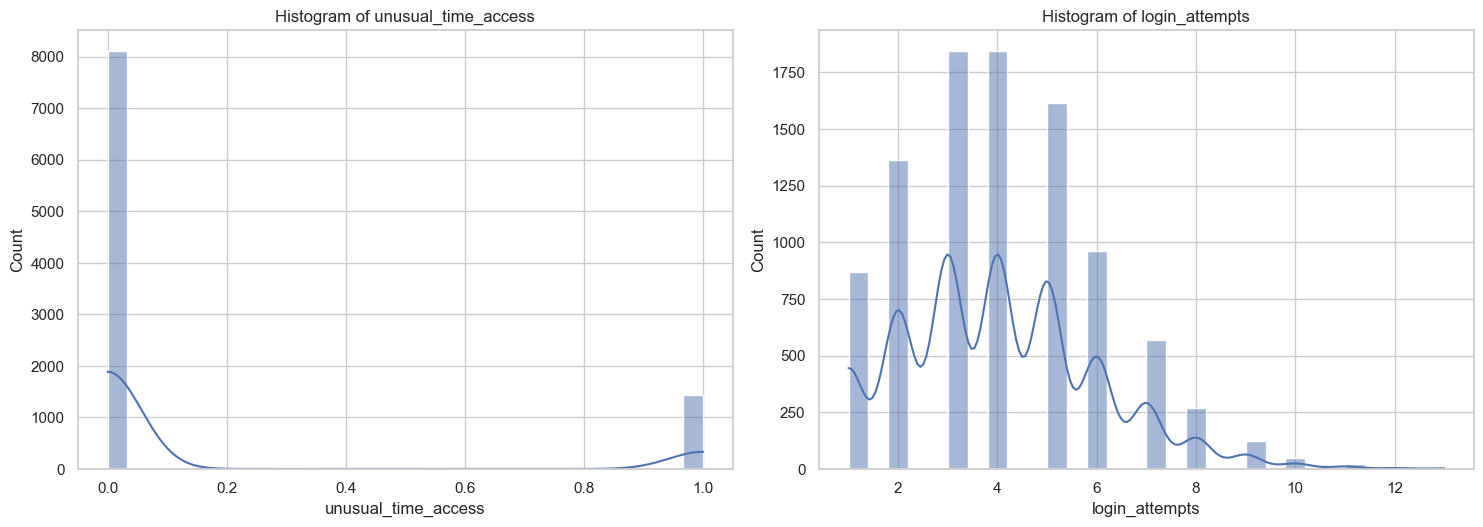

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numeric_columns = ['unusual_time_access', 'login_attempts']
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(ax=axes[i], x=data1[column])
    axes[i].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(2, len(numeric_columns), i + 1)
    sns.histplot(data1[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


In the cell below we drop the ID column because is useless right now, and split in unscaled data and targets 

In [57]:
from sklearn import preprocessing
unscaled_data = data1.iloc[:, 1:-1]  # Select all rows, columns from index 1 to second last
targets_data = data1.iloc[:,-1]


In the cell below we create dummies for all categorical variables

In [60]:
unscaled_data_dummies = pd.get_dummies(unscaled_data)
print(unscaled_data_dummies.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   network_packet_size   9537 non-null   int64  
 1   login_attempts        9537 non-null   int64  
 2   session_duration      9537 non-null   float64
 3   ip_reputation_score   9537 non-null   float64
 4   failed_logins         9537 non-null   int64  
 5   unusual_time_access   9537 non-null   int64  
 6   protocol_type_ICMP    9537 non-null   bool   
 7   protocol_type_TCP     9537 non-null   bool   
 8   protocol_type_UDP     9537 non-null   bool   
 9   encryption_used_AES   9537 non-null   bool   
 10  encryption_used_DES   9537 non-null   bool   
 11  browser_type_Chrome   9537 non-null   bool   
 12  browser_type_Edge     9537 non-null   bool   
 13  browser_type_Firefox  9537 non-null   bool   
 14  browser_type_Safari   9537 non-null   bool   
 15  browser_type_Unknown 

In the cell below we balance the dataset by ensuring the number of samples with target value 0  does not exceed the number of samples with target value 1. It counts the total ones # then removes excess zeros to create a balanced dataset.
ibution.


In [66]:
import numpy as np
num_one_targets = int(np.sum(targets_data))
zero_targets_counter = 0
indices_to_remove = []

for i in range(targets_data.shape[0]):
    if targets_data[i] ==0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

unscaled_inputs_equal_priors = np.delete(unscaled_data_dummies, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_data, indices_to_remove, axis = 0)

We standardize the dataset 

In [69]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

In this cell we create an array of indices, shuffle them, and use the shuffled order to rearrange both the inputs and targets. This helps prepare the data for training.

In [74]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

In this cell, we split the dataset into training, validation, and test sets. We first count the total number of samples and then allocate 80% for training, 10% for validation, and the remaining 10% for testing. The test set receives any leftover samples to ensure the total count remains accurate.


In [79]:
samples_count = shuffled_inputs.shape[0]
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

test_samples_count = samples_count - train_samples_count - validation_samples_count

In the cell below, we split the shuffled dataset into training, validation, and test sets. The training set gets the first "train_samples_count" samples, the validation set gets the next "validation_samples_count", and the test set contains the remaining samples. We then check if each set is balanced by printing the number of 1s, the total samples, and the proportion of 1s for each set.

In [82]:
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

3397 6822 0.4979478158897684
423 852 0.4964788732394366
444 854 0.5199063231850117


In the cell below, we save the training, validation, and test datasets to separate files using the np.savez function. This allows us to store the inputs and targets for each dataset in `.npz

In [86]:
np.savez('sec_data_train', inputs=train_inputs, targets=train_targets)
np.savez('sec_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('sec_data_test', inputs=test_inputs, targets=test_targets)

In [88]:
!pip install tensorflow



In the cell below, we load the training, validation, and test datasets from the `.npz` files  that we saved earlier. We ensure that the inputs are in float format and the targets are integers,# as required for training and evaluati.).

In [94]:
npz = np.load('sec_data_train.npz')

train_inputs = npz['inputs'].astype(float)
train_targets = npz['targets'].astype(int)

npz = np.load('sec_data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

npz = np.load('sec_data_test.npz')
test_inputs, test_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

In the cell below, we load the training dataset to retrieve the number of features (columns) in the input data just to be sure for the next code
 

In [97]:
npz = np.load('sec_data_train.npz')
num_features = npz['inputs'].shape[1] 
print(f"Number of features (inputs per sample): {num_features}")


Number of features (inputs per sample): 16


In the cell below, we define and compile a neural network model using TensorFlow's Keras API.The model consists of two hidden layers with ReLU activation functions, dropout layers to prevent overfitting, and a final output layer with softmax activation to classify into two categories (binary classification).


Epoch 1/100
69/69 - 3s - 38ms/step - accuracy: 0.6143 - loss: 0.6526 - val_accuracy: 0.7230 - val_loss: 0.5578
Epoch 2/100
69/69 - 0s - 5ms/step - accuracy: 0.7265 - loss: 0.5528 - val_accuracy: 0.7512 - val_loss: 0.5159
Epoch 3/100
69/69 - 0s - 3ms/step - accuracy: 0.7521 - loss: 0.5152 - val_accuracy: 0.7840 - val_loss: 0.4882
Epoch 4/100
69/69 - 0s - 3ms/step - accuracy: 0.7685 - loss: 0.4847 - val_accuracy: 0.7934 - val_loss: 0.4595
Epoch 5/100
69/69 - 0s - 3ms/step - accuracy: 0.7920 - loss: 0.4589 - val_accuracy: 0.7958 - val_loss: 0.4355
Epoch 6/100
69/69 - 0s - 3ms/step - accuracy: 0.8027 - loss: 0.4399 - val_accuracy: 0.8192 - val_loss: 0.4141
Epoch 7/100
69/69 - 0s - 3ms/step - accuracy: 0.8166 - loss: 0.4181 - val_accuracy: 0.8239 - val_loss: 0.3988
Epoch 8/100
69/69 - 0s - 3ms/step - accuracy: 0.8219 - loss: 0.4084 - val_accuracy: 0.8357 - val_loss: 0.3849
Epoch 9/100
69/69 - 0s - 3ms/step - accuracy: 0.8219 - loss: 0.3993 - val_accuracy: 0.8462 - val_loss: 0.3761
Epoch 10/

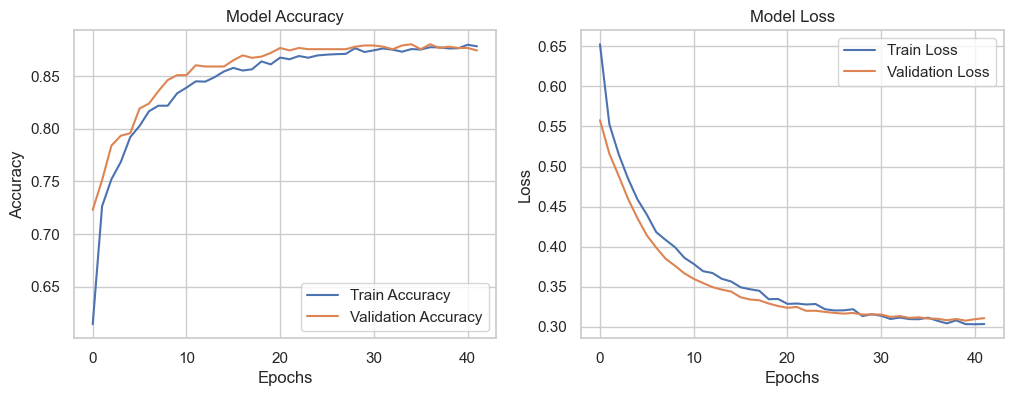

In [104]:
import tensorflow as tf
input_size = 16
output_size = 2
hidden_layer_size = 50

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer (20% neurons deactivated)
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Another Dropout layer
    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training parameters
batch_size = 100
max_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# Train the model and store history
history = model.fit(
    train_inputs, train_targets,
    batch_size=batch_size,
    epochs=max_epochs,
    validation_data=(validation_inputs, validation_targets),
    callbacks=[early_stopping],
    verbose=2
)

def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot accuracy
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    # Plot loss
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    plt.show()

plot_training_history(history)


In the cell below, we evaluate the trained model on the test dataset to assess its performance.  The model will calculate the loss and accuracy on the test set, and the results will be printed.

In [107]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8492 - loss: 0.3629 

Test loss: 0.37. Test accuracy: 84.66%


In the cell below, we use random numbers to see our predictions

In [110]:
new_data = [[1500, 1, 300, 0.1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]]
new_data = np.array(new_data)
predictions = model.predict(new_data)
predicted_class = np.argmax(predictions, axis=1)

print("Predicted class for the new input:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted class for the new input: [1]
